In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
advertising=pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
advertising.shape

(200, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**VIZUALIZING THE DATA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


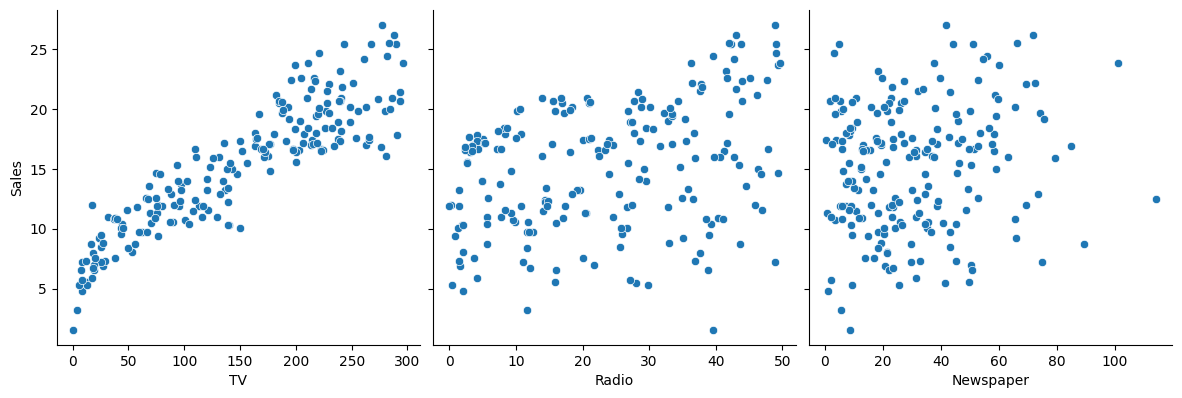

In [ ]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'],y_vars='Sales', size=4,aspect=1)
plt.show()

In [ ]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


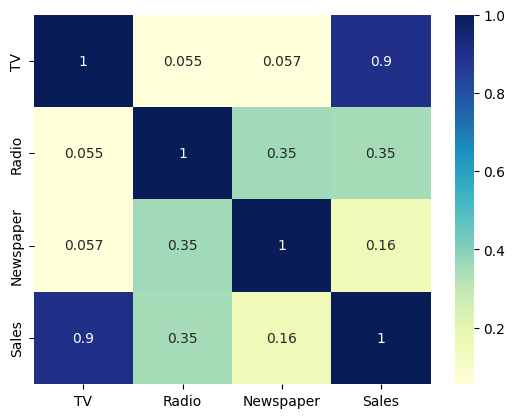

In [ ]:
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()

**BUILDING THE MODEL**

In [ ]:
#X=INDEPENDENT VARIABLE
#Y=DEPENDENT VARIABLE

In [ ]:
x=advertising['TV']
y=advertising['Sales']

TEST TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.7,test_size=0.3)

In [ ]:
x_train.head()

0      230.1
153    171.3
31     112.9
93     250.9
164    117.2
Name: TV, dtype: float64

In [ ]:
y_train.head()

0      22.1
153    16.0
31     11.9
93     22.2
164    11.9
Name: Sales, dtype: float64

BUILDING A LINEAR MODEL

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

lr=sm.OLS(y_train,x_train_sm).fit()

In [ ]:
lr.params

const    6.725024
TV       0.056751
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     626.7
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           3.68e-53
Time:                        05:11:40   Log-Likelihood:                -314.19
No. Observations:                 140   AIC:                             632.4
Df Residuals:                     138   BIC:                             638.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7250      0.402     16.749      0.000       5.931       7.519
TV             0.0568      0.002     25.033      0.000       0.052       0.061
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.036
Skew:                          -0.036   Prob(JB):                        0.982
Kurtosis:                       2.970   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

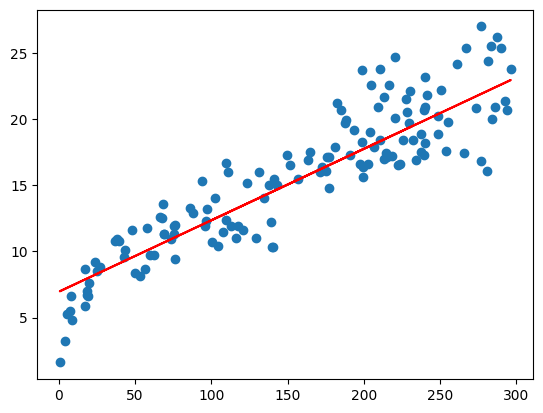

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()

In [ ]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train-y_train_pred)

<ipython-input-28-c112c3f74a65>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


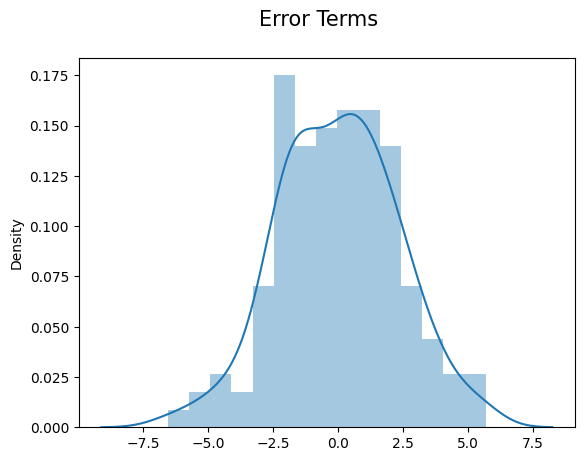

In [ ]:
fig=plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.show()

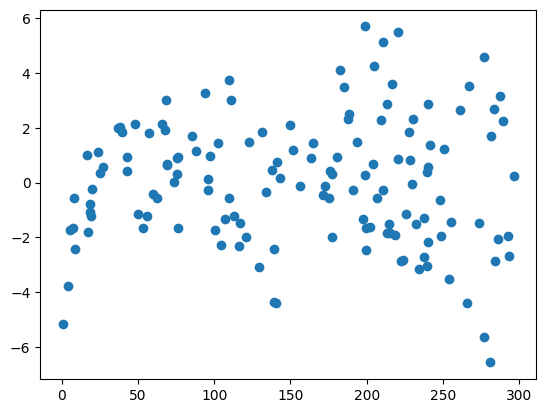

In [ ]:
# Looking for patterns in the residuals
plt.scatter(x_train,res)
plt.show()

PREDICTIONS ON THE TEST SET

In [ ]:
x_test_sm=sm.add_constant(x_test)

y_pred=lr.predict(x_test_sm)

In [ ]:
y_pred.head()

158     7.389007
154    17.382812
99     14.397723
177    16.383999
25     21.644793
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Looking at the RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.2998873652127534

In [ ]:
# Checking the RMSE on the test set
r_squared=r2_score(y_test, y_pred)
r_squared

0.780107289450699

VISUALIZING THE FIT ON THE TEST SET

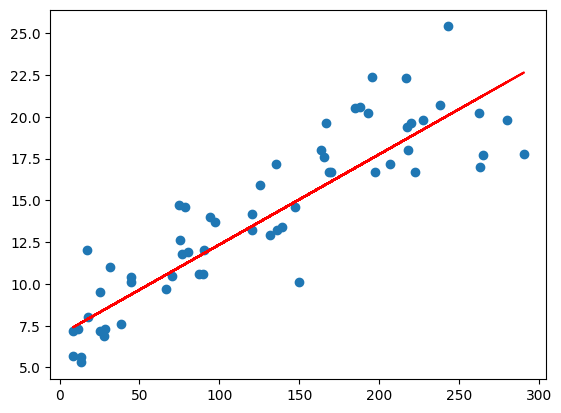

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.948+0.054*x_test,'r')
plt.show()